In [1]:
import pandas as pd
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

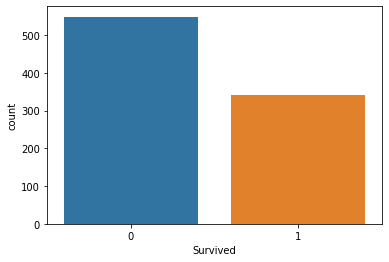

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

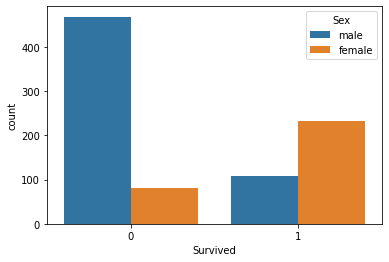

In [3]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

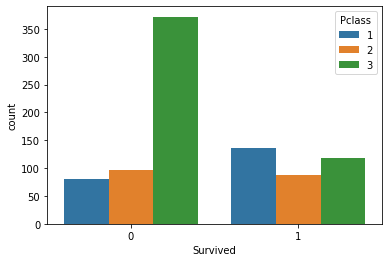

In [4]:
sns.countplot(x='Survived', hue='Pclass', data=train_data) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

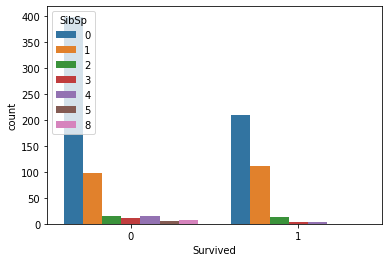

In [5]:
sns.countplot(x='Survived', hue='SibSp', data=train_data) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

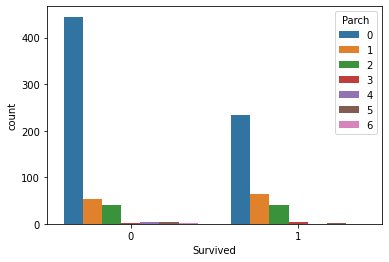

In [6]:
sns.countplot(x='Survived', hue='Parch', data=train_data) 

<AxesSubplot:xlabel='Survived', ylabel='count'>

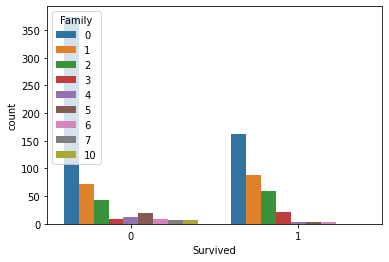

In [7]:

train_data['Family'] = train_data.Parch + train_data.SibSp
sns.countplot(x='Survived', hue='Family', data=train_data) 

In [8]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch']
y = train_data['Survived']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=8)
model.fit(X, y)  # обучаем модель
prediction = model.predict(X_test)  # делаем предсказание
output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':prediction})
output.to_csv('my_submission.csv', index=False)  # формируем итоговый датафрейм и сохраняем его в csv файл